Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset. Determine the number of clusters using the elbow method.
Dataset link : https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('sales_data_sample.csv', encoding='unicode_escape')

In [19]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [21]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [22]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [23]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [24]:
df.drop([ 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE','CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
        'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME','ORDERDATE' ],inplace=True,axis=1)
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,10107,30,95.70,2,2871.00,Shipped,95,S10_1678,USA,Small
1,10121,34,81.35,5,2765.90,Shipped,95,S10_1678,France,Small
2,10134,41,94.74,2,3884.34,Shipped,95,S10_1678,France,Medium
3,10145,45,83.26,6,3746.70,Shipped,95,S10_1678,USA,Medium
4,10159,49,100.00,14,5205.27,Shipped,95,S10_1678,USA,Medium
...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,Shipped,54,S72_3212,Spain,Small
2819,10373,29,100.00,1,3978.51,Shipped,54,S72_3212,Finland,Medium
2820,10386,43,100.00,4,5417.57,Resolved,54,S72_3212,Spain,Medium
2821,10397,34,62.24,1,2116.16,Shipped,54,S72_3212,France,Small


In [14]:
df.shape

(2823, 11)

In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

def convert_categories(col):
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col].values)



In [28]:
categories=['SALES','STATUS','MSRP','PRODUCTCODE','COUNTRY','DEALSIZE']
for col in categories:
    convert_categories(col)


In [29]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,10107,30,95.70,2,1176,5,39,0,18,2
1,10121,34,81.35,5,1091,5,39,0,6,2
2,10134,41,94.74,2,1800,5,39,0,6,1
3,10145,45,83.26,6,1723,5,39,0,18,1
4,10159,49,100.00,14,2284,5,39,0,18,1
...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,728,5,10,108,14,2
2819,10373,29,100.00,1,1851,5,10,108,5,1
2820,10386,43,100.00,4,2341,4,10,108,14,1
2821,10397,34,62.24,1,632,5,10,108,6,2


In [31]:
stdScaler=StandardScaler()
data= stdScaler.fit_transform(df)


In [33]:
print(data)

[[-1.64794709 -0.52289086  0.5969775  ... -1.70278009  0.96788903
   1.01535268]
 [-1.4958875  -0.11220131 -0.11445035 ... -1.70278009 -0.97742149
   1.01535268]
 [-1.35468931  0.60650538  0.54938372 ... -1.70278009 -0.97742149
  -0.672716  ]
 ...
 [ 1.38238338  0.81185016  0.81015797 ...  1.717138    0.31945219
  -0.672716  ]
 [ 1.50185877 -0.11220131 -1.06186404 ...  1.717138   -0.97742149
   1.01535268]
 [ 1.68650256  1.2225397  -0.89925195 ...  1.717138    0.96788903
  -0.672716  ]]


In [36]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,15):
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=15)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

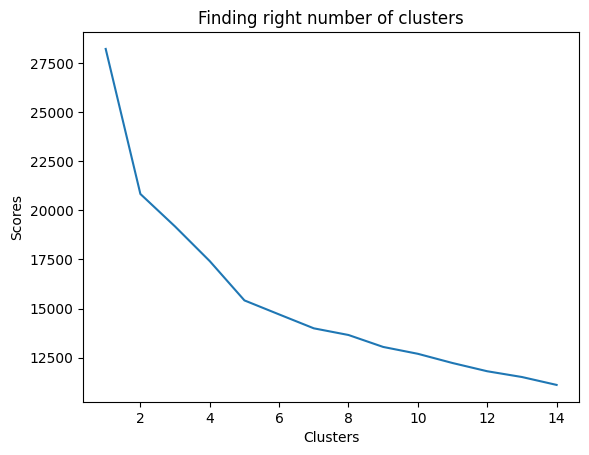

In [37]:
k=list(range(1,15))
plt.plot(k,wcss)
plt.xlabel("Clusters")
plt.ylabel("Scores")
plt.title("Finding right number of clusters")
plt.show()